# Geoquoteerde eindoefening

## Max Valkenburg & Emile Knaepen

# Setting up dataframe and imports

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

In [2]:
#datetime parsen
def parser(x):
    return datetime.strptime(x, '%d/%m/%Y %H:%M')

In [3]:
#read data
SolarData = pd.read_excel('SolarForecast.xls', parse_dates=[0], index_col='DateTime', date_parser=parser)

In [4]:
SolarData.head()

,Most recent forecast [MW],Day-Ahead forecast [MW],Week-Ahead forecast [MW],Real-time Upscaled Measurement [MW],Corrected Upscaled Measurement [MW],Monitored Capacity [MWp],Day-Ahead forecast (11h00) [MW]
DateTime,,,,,,,
2020-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 00:15:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 00:30:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 00:45:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0
2020-11-01 01:00:00,0.0,0.0,0.0,0.0,0.0,4037.14,0.0


In [5]:
SolarData.describe()

,Most recent forecast [MW],Day-Ahead forecast [MW],Week-Ahead forecast [MW],Real-time Upscaled Measurement [MW],Corrected Upscaled Measurement [MW],Monitored Capacity [MWp],Day-Ahead forecast (11h00) [MW]
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.00,2880.000000
mean,182.063976,184.772465,172.949524,181.968361,174.375819,4037.14,186.468549
std,341.131936,347.318288,308.062869,349.078161,345.762503,0.00,347.514519
min,0.000000,0.000000,0.000000,0.000000,0.000000,4037.14,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4037.14,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4037.14,0.000000
75%,227.157500,220.230000,262.690000,220.555000,187.170000,4037.14,230.605000
max,1580.210000,1606.320000,1420.990000,1800.640000,1748.420000,4037.14,1575.510000


In [6]:
#juiste data selecteren
SolarData = SolarData.rename({"Corrected Upscaled Measurement [MW]" : "Measurement"}, axis = 'columns')
Data = SolarData.drop(columns=['Most recent forecast [MW]','Day-Ahead forecast [MW]', 'Week-Ahead forecast [MW]',
                     'Real-time Upscaled Measurement [MW]', 'Monitored Capacity [MWp]', 'Day-Ahead forecast (11h00) [MW]'])
Data.head()

,Measurement
DateTime,
2020-11-01 00:00:00,0.0
2020-11-01 00:15:00,0.0
2020-11-01 00:30:00,0.0
2020-11-01 00:45:00,0.0
2020-11-01 01:00:00,0.0


<AxesSubplot:xlabel='DateTime'>

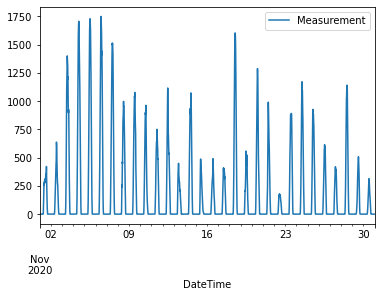

In [7]:
Data.plot()

In [8]:
#tijd elke 15min instellen
Data.index = Data.index.to_period('15T')

## 1. (S)Arima model

In [9]:
#fit and make model
model = ARIMA(Data, order= (1,1,1))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Measurement   No. Observations:                 2880
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12652.426
Date:                Thu, 07 Jan 2021   AIC                          25310.852
Time:                        15:48:19   BIC                          25328.748
Sample:                    11-01-2020   HQIC                         25317.302
                         - 11-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9147      0.005    177.994      0.000       0.905       0.925
ma.L1         -0.1826      0.009    -19.523      0.000      -0.201      -0.164
sigma2       384.4022      3.522    109.154      0.000     377.500     391.305
===================================================================================
Ljung-Box (L1) (Q):                   1.09   Jarque-Bera (JB):             38885.36
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                            -2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Forecast predicitions maken

<AxesSubplot:xlabel='DateTime'>

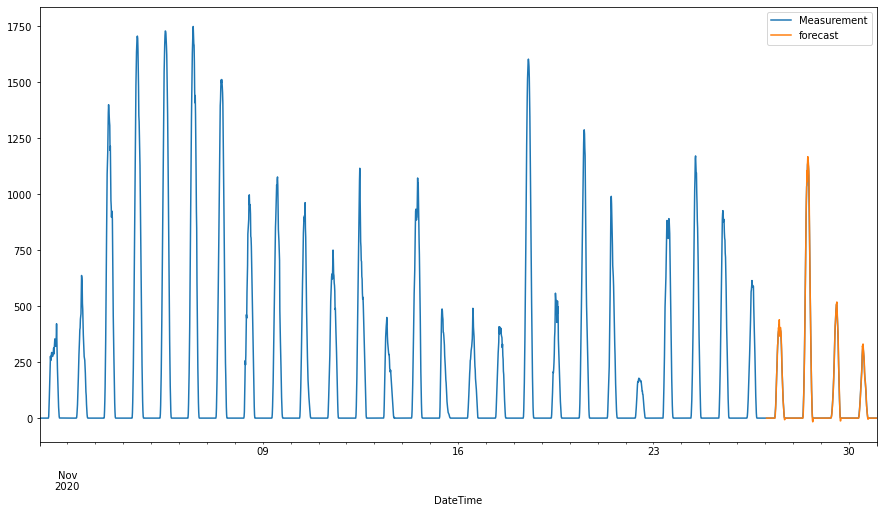

In [10]:
#forecast predicten
Data['forecast']=model_fit.predict(start=2500, end=2881, dynamic=False)
Data[['Measurement', 'forecast']].plot(figsize=(15,8))

<AxesSubplot:xlabel='DateTime'>

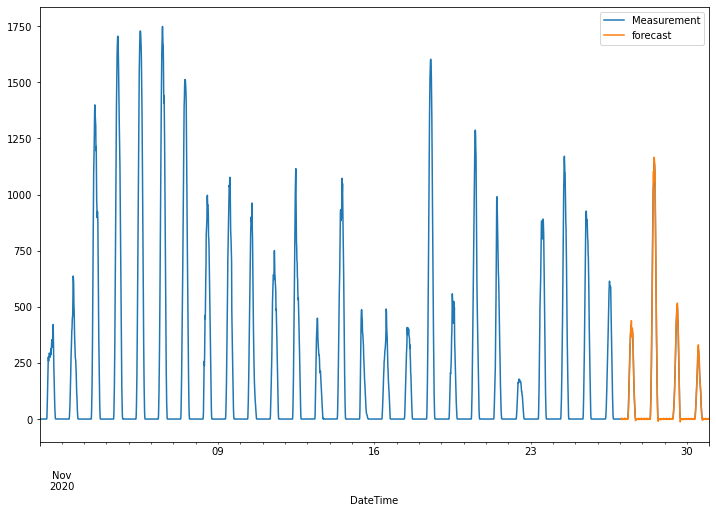

In [11]:
Data.dropna()
model_2 = sm.tsa.statespace.SARIMAX(Data['Measurement'], order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model_2.fit()
Data['forecast']=results.predict(start=2500, end=2881, dynamic=False)
Data[['Measurement', 'forecast']].plot(figsize=(12,8))

# 2. LTSM model

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [14]:
#drop timedate for LTSM
LTSMData = SolarData.drop(columns=['Most recent forecast [MW]','Day-Ahead forecast [MW]', 'Week-Ahead forecast [MW]',
                     'Real-time Upscaled Measurement [MW]', 'Monitored Capacity [MWp]', 'Day-Ahead forecast (11h00) [MW]'])
LTSMData.head()

,Measurement
DateTime,
2020-11-01 00:00:00,0.0
2020-11-01 00:15:00,0.0
2020-11-01 00:30:00,0.0
2020-11-01 00:45:00,0.0
2020-11-01 01:00:00,0.0


In [15]:
# fix random seed for reproducibility
np.random.seed(7)

In [16]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
LTSMData = scaler.fit_transform(LTSMData)

In [17]:
# split into train and test sets
train_size = int(len(LTSMData) * 0.67)
test_size = len(LTSMData) - train_size
train, test = LTSMData[0:train_size,:], LTSMData[train_size:len(LTSMData),:]
print(f" length training set: {len(train)} and length test set: {len(test)}")

 length training set: 1929 and length test set: 951


In [18]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [19]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1927/1927 - 2s - loss: 0.0121
Epoch 2/10
1927/1927 - 2s - loss: 6.9080e-04
Epoch 3/10
1927/1927 - 2s - loss: 7.0451e-04
Epoch 4/10
1927/1927 - 2s - loss: 6.9930e-04
Epoch 5/10
1927/1927 - 2s - loss: 6.9838e-04
Epoch 6/10
1927/1927 - 2s - loss: 6.9711e-04
Epoch 7/10
1927/1927 - 2s - loss: 7.0045e-04
Epoch 8/10
1927/1927 - 2s - loss: 7.0433e-04
Epoch 9/10
1927/1927 - 2s - loss: 6.9770e-04
Epoch 10/10
1927/1927 - 2s - loss: 7.0000e-04


In [21]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 47.58 RMSE
Test Score: 36.45 RMSE


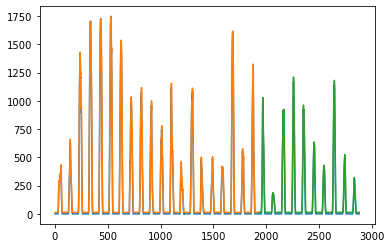

In [22]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(LTSMData)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(LTSMData)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(LTSMData)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(LTSMData))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# 3. Facebook Prophet model

In [23]:
from fbprophet import Prophet
import os
import pystan
os.environ['NUMEXPR_MAX_THREADS'] = '2'
df = pd.read_excel('SolarForecast.xls', header=0)
df= df.drop(columns=['Most recent forecast [MW]','Day-Ahead forecast [MW]', 'Week-Ahead forecast [MW]',
                     'Real-time Upscaled Measurement [MW]', 'Monitored Capacity [MWp]', 'Day-Ahead forecast (11h00) [MW]'])
df = df.rename({"DateTime" : "ds"}, axis = 'columns')
df = df.rename({"Corrected Upscaled Measurement [MW]" : "y"}, axis = 'columns')
df['ds']= pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2020-01-11 00:00:00,0.0
1,2020-01-11 00:15:00,0.0
2,2020-01-11 00:30:00,0.0
3,2020-01-11 00:45:00,0.0
4,2020-01-11 01:00:00,0.0


In [24]:
m = Prophet(yearly_seasonality=True)
m.fit(df)

In [25]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3240,2021-12-07 23:45:00
3241,2021-12-08 23:45:00
3242,2021-12-09 23:45:00
3243,2021-12-10 23:45:00
3244,2021-12-11 23:45:00


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3240,2021-12-07 23:45:00,96.563299,-116.093137,301.737841
3241,2021-12-08 23:45:00,133.369555,-100.598665,343.212049
3242,2021-12-09 23:45:00,26.779612,-179.403318,252.767030
3243,2021-12-10 23:45:00,147.704433,-54.567669,362.293975
3244,2021-12-11 23:45:00,106.170932,-105.592505,322.045176


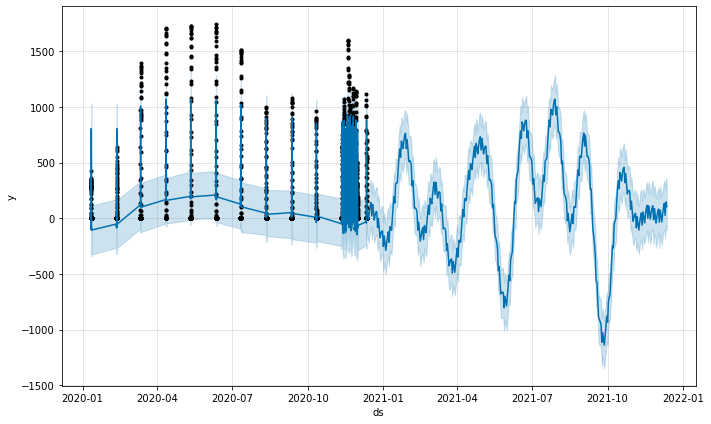

In [27]:
fig1 = m.plot(forecast)

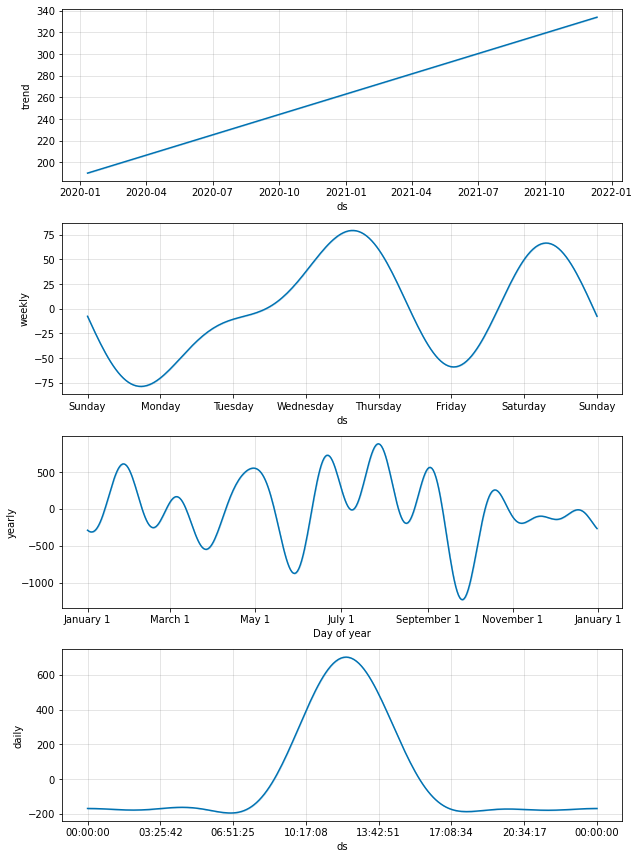

In [28]:
fig2 = m.plot_components(forecast)

# 4. RNN of GRU model